In [1]:
import numpy as np
import pandas as pd
from math import *
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
def MAPE(actual, predicted):
    return np.mean(np.abs(actual-predicted)/actual)

C:\Users\bluet\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
stocks = pd.read_csv("stockPrices.csv")
stocks['Date'] = stocks['Date'].astype('datetime64[ns]')
stocks.head()

,Date,AAPL,GOOG,TSLA,KO,OXY,BAC
0,2022-03-24,174.070007,141.311996,337.973328,60.980000,57.750000,43.070000
1,2022-03-25,174.720001,141.521500,336.880005,61.529999,58.709999,43.730000
2,2022-03-28,175.600006,141.949997,363.946655,61.919998,56.639999,43.549999
3,2022-03-29,178.960007,143.250000,366.523346,62.160000,56.790001,43.439999
4,2022-03-30,177.770004,142.644501,364.663330,62.209999,57.480000,43.000000


18:17:11 - cmdstanpy - INFO - Chain [1] start processing
18:17:11 - cmdstanpy - INFO - Chain [1] done processing


MSE = 221.21601055086364


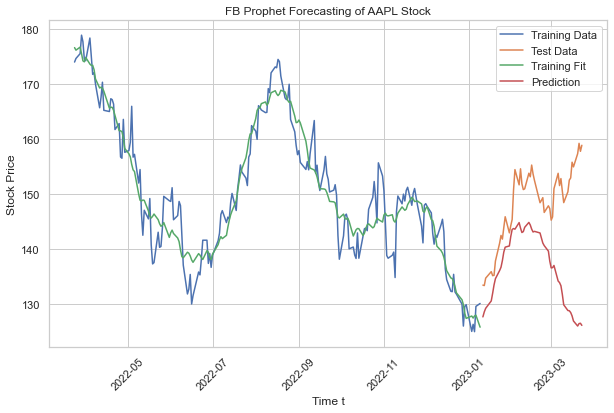

In [5]:
# Define our model with monthly/yearly seasonality
model = Prophet(
        daily_seasonality = False,
        weekly_seasonality = False,
        yearly_seasonality = False
    ).add_seasonality(name = 'yearly', period = 365.25, fourier_order = 6)
model.add_seasonality(name = 'daily', period = 1, fourier_order = 10)
model.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 7)
#Create our dataframes
train, valid, test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
train['ds'] = stocks['Date'][:int(len(stocks['Date'])*0.8)]
train['y'] = stocks['AAPL'][:int(len(stocks['AAPL'])*0.8)]
test['ds'] = stocks['Date'][int(len(stocks['Date'])*0.8)+1:]
test['y'] = stocks['AAPL'][int(len(stocks['AAPL'])*0.8)+1:]
model.fit(train)
fit = model.predict(pd.DataFrame({'ds': train['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
predictions = model.predict(pd.DataFrame({'ds': test['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data') # plot validation vs. fit
plt.plot(test, label = 'Test Data')
plt.plot(fit, label = 'Training Fit')
plt.plot(predictions, label = 'Prediction')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('FB Prophet Forecasting of AAPL Stock')
plt.legend()
print("MSE = {}".format(mean_squared_error(test.value.values, predictions.values)))

18:17:22 - cmdstanpy - INFO - Chain [1] start processing
18:17:22 - cmdstanpy - INFO - Chain [1] done processing


MSE = 116.12125510672155


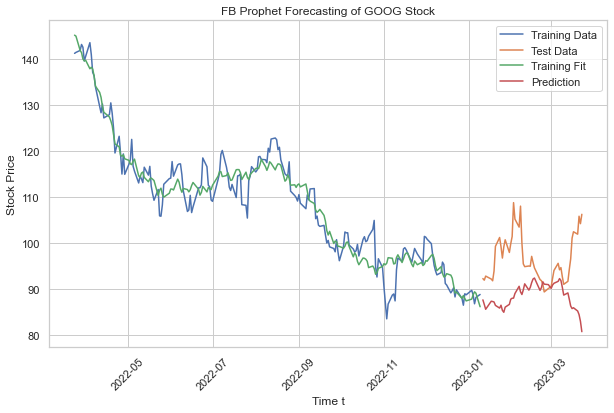

In [6]:
# Define our model with monthly/yearly seasonality
model = Prophet(
        daily_seasonality = False,
        weekly_seasonality = False,
        yearly_seasonality = False
    ).add_seasonality(name = 'yearly', period = 365.25, fourier_order = 4)
model.add_seasonality(name = 'daily', period = 1, fourier_order = 40)
model.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 9)
#Create our dataframes
train, valid, test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
train['ds'] = stocks['Date'][:int(len(stocks['Date'])*0.8)]
train['y'] = stocks['GOOG'][:int(len(stocks['GOOG'])*0.8)]
test['ds'] = stocks['Date'][int(len(stocks['Date'])*0.8)+1:]
test['y'] = stocks['GOOG'][int(len(stocks['GOOG'])*0.8)+1:]
model.fit(train)
fit = model.predict(pd.DataFrame({'ds': train['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
predictions = model.predict(pd.DataFrame({'ds': test['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data') # plot validation vs. fit
plt.plot(test, label = 'Test Data')
plt.plot(fit, label = 'Training Fit')
plt.plot(predictions, label = 'Prediction')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('FB Prophet Forecasting of GOOG Stock')
plt.legend()
print("MSE = {}".format(mean_squared_error(test.value.values, predictions.values)))

18:17:31 - cmdstanpy - INFO - Chain [1] start processing
18:17:31 - cmdstanpy - INFO - Chain [1] done processing


MSE = 14739.663528620496


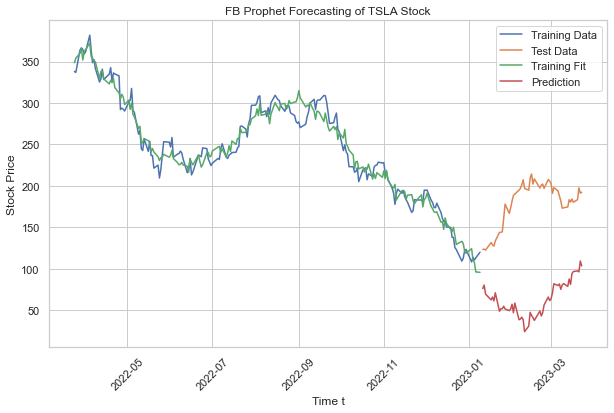

In [7]:
# Define our model with monthly/yearly seasonality
model = Prophet(
        daily_seasonality = False,
        weekly_seasonality = False,
        yearly_seasonality = False
    ).add_seasonality(name = 'yearly', period = 365.25, fourier_order = 5)
model.add_seasonality(name = 'daily', period = 1, fourier_order = 100)
model.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 20)
#Create our dataframes
train, valid, test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
train['ds'] = stocks['Date'][:int(len(stocks['Date'])*0.8)]
train['y'] = stocks['TSLA'][:int(len(stocks['TSLA'])*0.8)]
test['ds'] = stocks['Date'][int(len(stocks['Date'])*0.8)+1:]
test['y'] = stocks['TSLA'][int(len(stocks['TSLA'])*0.8)+1:]
model.fit(train)
fit = model.predict(pd.DataFrame({'ds': train['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
predictions = model.predict(pd.DataFrame({'ds': test['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data') # plot validation vs. fit
plt.plot(test, label = 'Test Data')
plt.plot(fit, label = 'Training Fit')
plt.plot(predictions, label = 'Prediction')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('FB Prophet Forecasting of TSLA Stock')
plt.legend()
print("MSE = {}".format(mean_squared_error(test.value.values, predictions.values)))

18:17:40 - cmdstanpy - INFO - Chain [1] start processing
18:17:40 - cmdstanpy - INFO - Chain [1] done processing


MSE = 3.140397624979015


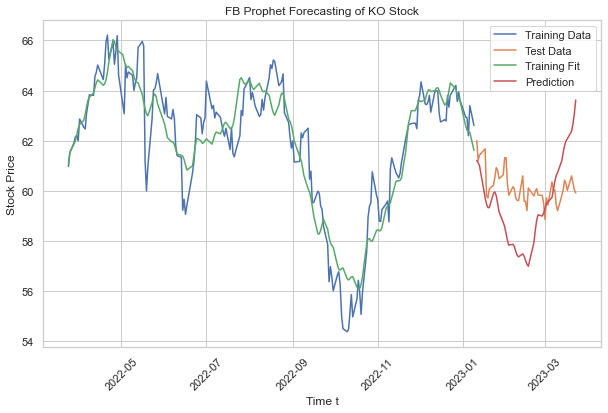

In [8]:
# Define our model with monthly/yearly seasonality
model = Prophet(
        daily_seasonality = False,
        weekly_seasonality = False,
        yearly_seasonality = False
    ).add_seasonality(name = 'yearly', period = 365.25, fourier_order = 3)
model.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
model.add_seasonality(name = 'daily', period = 1, fourier_order = 50)
#Create our dataframes
train, valid, test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
train['ds'] = stocks['Date'][:int(len(stocks['Date'])*0.8)]
train['y'] = stocks['KO'][:int(len(stocks['KO'])*0.8)]
test['ds'] = stocks['Date'][int(len(stocks['Date'])*0.8)+1:]
test['y'] = stocks['KO'][int(len(stocks['KO'])*0.8)+1:]
model.fit(train)
fit = model.predict(pd.DataFrame({'ds': train['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
predictions = model.predict(pd.DataFrame({'ds': test['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data') # plot validation vs. fit
plt.plot(test, label = 'Test Data')
plt.plot(fit, label = 'Training Fit')
plt.plot(predictions, label = 'Prediction')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('FB Prophet Forecasting of KO Stock')
plt.legend()
print("MSE = {}".format(mean_squared_error(test.value.values, predictions.values)))

18:17:47 - cmdstanpy - INFO - Chain [1] start processing
18:17:47 - cmdstanpy - INFO - Chain [1] done processing


MSE = 50.5377401783871


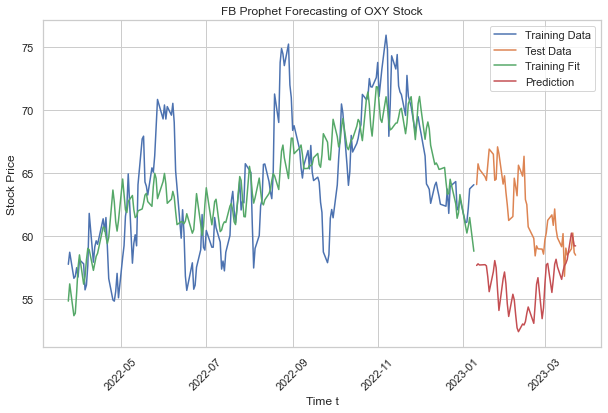

In [9]:
# Define our model with monthly/yearly seasonality
model = Prophet(
        daily_seasonality = False,
        weekly_seasonality = False,
        yearly_seasonality = False
    ).add_seasonality(name = 'yearly', period = 365.25, fourier_order = 3)
model.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
model.add_seasonality(name = 'daily', period = 1, fourier_order = 40)
#Create our dataframes
train, valid, test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
train['ds'] = stocks['Date'][:int(len(stocks['Date'])*0.8)]
train['y'] = stocks['OXY'][:int(len(stocks['OXY'])*0.8)]
test['ds'] = stocks['Date'][int(len(stocks['Date'])*0.8)+1:]
test['y'] = stocks['OXY'][int(len(stocks['OXY'])*0.8)+1:]
model.fit(train)
fit = model.predict(pd.DataFrame({'ds': train['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
predictions = model.predict(pd.DataFrame({'ds': test['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data') # plot validation vs. fit
plt.plot(test, label = 'Test Data')
plt.plot(fit, label = 'Training Fit')
plt.plot(predictions, label = 'Prediction')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('FB Prophet Forecasting of OXY Stock')
plt.legend()
print("MSE = {}".format(mean_squared_error(test.value.values, predictions.values)))

18:17:54 - cmdstanpy - INFO - Chain [1] start processing
18:17:54 - cmdstanpy - INFO - Chain [1] done processing


MSE = 24.537402963940362


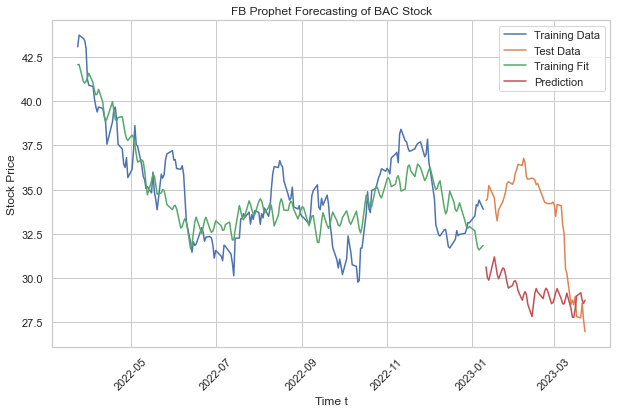

In [10]:
# Define our model with monthly/yearly seasonality
model = Prophet(
        daily_seasonality = False,
        weekly_seasonality = False,
        yearly_seasonality = False
    ).add_seasonality(name = 'yearly', period = 365.25, fourier_order = 3)
model.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
model.add_seasonality(name = 'daily', period = 1, fourier_order = 20)
#Create our dataframes
train, valid, test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
train['ds'] = stocks['Date'][:int(len(stocks['Date'])*0.8)]
train['y'] = stocks['BAC'][:int(len(stocks['BAC'])*0.8)]
test['ds'] = stocks['Date'][int(len(stocks['Date'])*0.8)+1:]
test['y'] = stocks['BAC'][int(len(stocks['BAC'])*0.8)+1:]
model.fit(train)
fit = model.predict(pd.DataFrame({'ds': train['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
predictions = model.predict(pd.DataFrame({'ds': test['ds']}))[['ds', 'yhat']].set_index('ds').rename(columns = {'yhat': 'value'})
train = train.rename(columns = {'y': 'value'}).set_index('ds')
test = test.rename(columns = {'y': 'value'}).set_index('ds')
plt.figure(figsize=(10,6))
plt.plot(train, label = 'Training Data') # plot validation vs. fit
plt.plot(test, label = 'Test Data')
plt.plot(fit, label = 'Training Fit')
plt.plot(predictions, label = 'Prediction')
plt.xlabel('Time t')
plt.xticks(rotation= 45)
plt.ylabel('Stock Price')
plt.title('FB Prophet Forecasting of BAC Stock')
plt.legend()
print("MSE = {}".format(mean_squared_error(test.value.values, predictions.values)))